# This is a environment to test, prototype, and develop CCBA Library.

In [36]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sys.path.insert(0, '/Users/Kwat/binf/ccba')
import ccbal

%matplotlib inline
%config InlineBackend.figure_formats = {'svg', }

# Make test data

In [2]:
FONT1 = ccbal.visualize.FONT1
FONT2 = ccbal.visualize.FONT2
FONT3 = ccbal.visualize.FONT3
font1=FONT1
font2=FONT2
font3=FONT3

CMAP_CONTINUOUS = ccbal.visualize.CMAP_CONTINUOUS
CMAP_CATEGORICAL = ccbal.visualize.CMAP_CATEGORICAL
CMAP_BINARY = ccbal.visualize.CMAP_BINARY

In [55]:
nrow = 50
ncol = 50

df = pd.DataFrame(np.random.random((nrow, ncol)))
df.index = pd.Series(['GENE {}'.format(i) for i in range(nrow)])
ref = pd.Series(np.random.rand(ncol), name='Reference')
annot = pd.Series(np.random.rand(nrow), name='Score')
title = 'Title'
ref_type='continuous'
sort_ref=True

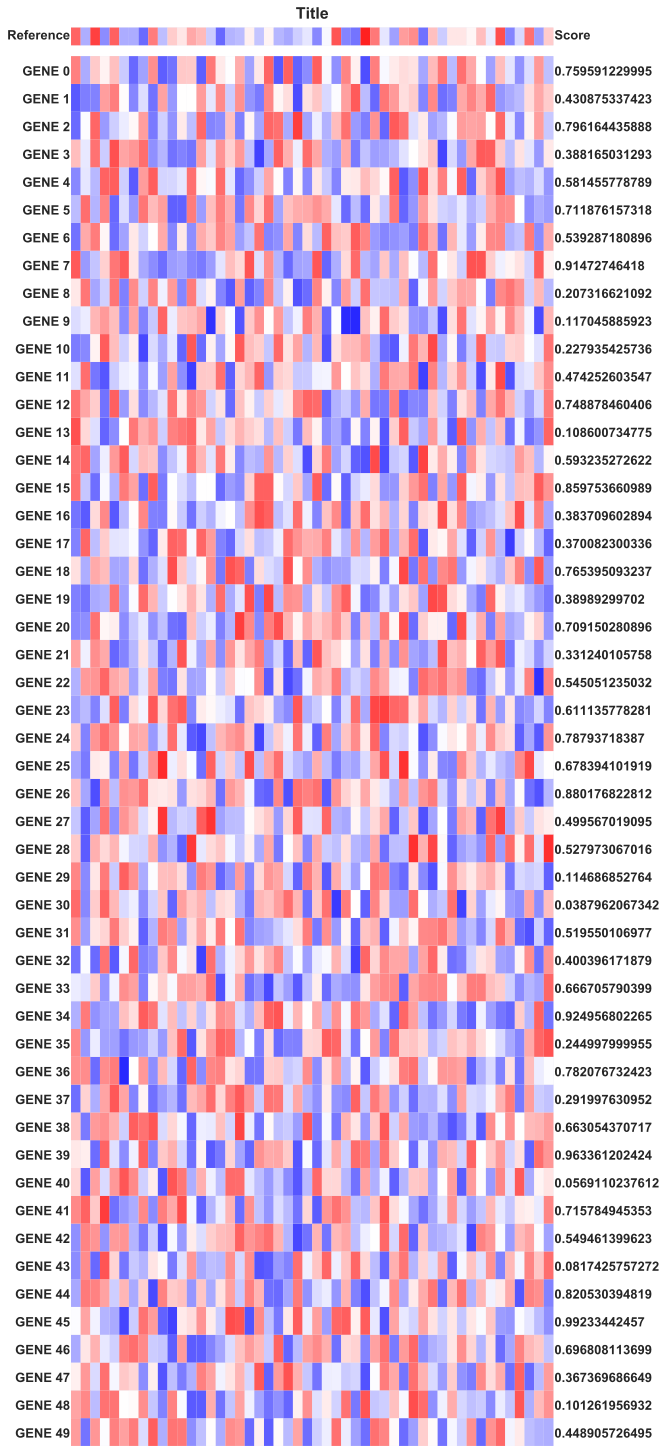

In [56]:
# Preprocess ref
if ref_type == 'binary':
    ref_cmap = CMAP_BINARY
    ref_min, ref_max = 0, 1
elif ref_type == 'categorical':
    ref_cmap = CMAP_CATEGORICAL
    ref_min, ref_max = 0, np.unique(ref.values).size
    assert np.unique(categories).size == np.unique(ref.values).size
elif ref_type == 'continuous':
    ref_cmap = CMAP_CONTINUOUS
    ref = (ref - np.mean(ref)) / np.std(ref)
    ref_min, ref_max = -2.5, 2.5
else:
    raise ValueError('Unknown ref_type {}.'.format(ref_type))

# Preprocess df
if np.unique(df).size == 2:
    df_cmap = CMAP_BINARY
    df_min, df_max = 0, 1
    # TODO:
    df += 0.25
else:
    df_cmap = CMAP_CONTINUOUS
    df_min, df_max = -2.5, 2.5
    # TODO: make a normalization function
    for i, (idx, s) in enumerate(df.iterrows()):
        mean = s.mean()
        std = s.std()
        for j, v in enumerate(s):
            df.iloc[i, j] = (v - mean) / std

# Set figure size
ncol, nrow = df.shape
if nrow <= 25:
    fig_height = nrow / 1.5
else:
    fig_height = nrow / 2.5
if ncol <= 25:
    fig_width = 5
else:
    fig_width = 7
figure_size = (fig_width, fig_height)

if sort_ref:
    order = 
    t_order = list(reversed(np.argsort(ref.values[0, :])))
    ref = ref.reindex_axis(ref.columns[t_order], axis=1)
    df.reindex_axis(df.columns[t_order], axis=1)

    # Computer locations for class labels (for binary or categorical)
    if (ref_type == 'binary' or ref_type == 'categ') and class_labels != None:
        boundaries = np.zeros(len(np.unique(ref.iloc[0, :])))
        locs_labels = np.zeros(len(np.unique(ref.iloc[0, :])))
        k = 0
        for i in range(1, ncol):
            if ref.iloc[0, i] != ref.iloc[0, i - 1]:
                boundaries[k] = i
                k += 1
        boundaries[len(boundaries) - 1] = ncol
        locs_labels[0] = boundaries[0] / 2
        for k in range(1, len(locs_labels)):
            locs_labels[k] = boundaries[k] - (boundaries[k] - boundaries[k - 1]) / 2.0

# Initialize figure
fig = plt.figure(figsize=figure_size)

# Plot ref
ax1 = plt.subplot2grid((nrow, 1), (0, 0))
sns.heatmap(pd.DataFrame(ref).T, vmin=ref_min, vmax=ref_max, robust=True, center=None, mask=None,
            square=False, cmap=ref_cmap, linewidth=0.0, linecolor='b',
            annot=False, fmt=None, annot_kws={}, xticklabels=False,
            yticklabels=[], cbar=False)
ax1.text(ncol / 2, 1.5, title, fontsize=16, horizontalalignment='center', fontweight='bold')
ax1.text(-0.1, 0.33, 
         ref.name, fontsize=13, horizontalalignment='right', fontweight='bold')
ax1.text(ncol + 0.1, 0.33,
         annot.name, fontsize=13, horizontalalignment='left', fontweight='bold')

if (ref_type == 'binary' or ref_type == 'categorical') and class_labels != None:
    for k in range(len(locs_labels)):
        ax1.text(locs_labels[k], 0.25, class_labels[k], fontsize=13, horizontalalignment='center',
                 fontweight='bold')

# Plot dataframe
ax2 = plt.subplot2grid((nrow, 1), (0, 1), rowspan=nrow)
sns.heatmap(df, vmin=df_min, vmax=df_max, robust=True, center=None, mask=None,
            square=False, cmap=df_cmap, linewidth=0.0, linecolor='b',
            annot=False, fmt=None, annot_kws={}, xticklabels=False,
            yticklabels=[], cbar=False)

for i, idx in enumerate(df.index):
    ax2.text(-0.1, nrow - i - 0.7, idx, fontsize=13, horizontalalignment='right', fontweight='bold')
    ax2.text(ncol + 0.1, nrow - i - 0.7, annot[i], fontsize=13, fontweight='bold')

fig.tight_layout()
plt.show(fig)

# NMF

In [ ]:
nmf_result = ccbal.analyze.nmf(df, [3], plot=True)

In [ ]:
ns, runtimes = ccbal.support.runtime(ccbal.information.information_coefficient, n_range=range(10))

In [ ]:
from scipy.stats import pearsonr
ns, runtimes = ccbal.support.runtime(pearsonr, n_range=range(10))

In [ ]:
# make_heatmap_panel is in the ccba/library/ccba.py
# make_heatmap_panel calls plot_heatmap_panel, which is in the ccba/library/visualize.py
# make_heatmap_panel computes IC of each df's row and the ref (target).
# In the future, we can add other computation within this function so it can compute P-Val and FDR as well.
make_heatmap_panel(df, ref, ['IC', 'P-Val'])

# XXX

In [ ]:
# Feature selection test with real data for IC, CMI diff, and CMI ratio association metrics
## Ranking 60 genes + target profile with respect to the activation profile of KRAS component 6 (BRAF/MAPK)



## Feature selection using Information Coefficient

start_time = time.time()

gct1 = read_gct('/Users/tamayo/UCSD_2015/signatures/paper2/analysis/top_hits.gct', fill_na=0)
gct2 = read_gct('/Users/tamayo/UCSD_2015/signatures/Onco-GPS/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct', fill_na=0)

common_cols = list(set(gct1.columns) & set(gct2.columns))
A = gct1[common_cols]
B = gct2[common_cols]
target = pd.DataFrame(B.loc['KRAS_SALE_Late_Comp_C6_9'])
target = target.T

IC = np.zeros(A.shape[0])
for i in range(A.shape[0]):
    IC[i] = round(compute_information_coefficient(x=target.iloc[0,:], y=A.iloc[i,:]), 3)  
                
IC_order = list(np.argsort(IC, kind='quicksort'))
IC = IC[IC_order]
A_sorted = A.reindex(A.index[IC_order]) 

end_time = time.time() 
print("Feature selection time %s seconds " % (end_time - start_time))

IC_val = pd.Series(IC[:A.shape[0]], name = "IC")
features = A_sorted.head(A.shape[0])
plot_heatmap_panel_v2(target, features, IC_val, "KRAS component 6 (BRAF/MAPK) co-essential genes")

## Feature selection using CMI diff

start_time = time.time()

gct1 = read_gct('/Users/tamayo/UCSD_2015/signatures/paper2/analysis/top_hits.gct', fill_na=0)
gct2 = read_gct('/Users/tamayo/UCSD_2015/signatures/Onco-GPS/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct', fill_na=0)

common_cols = list(set(gct1.columns) & set(gct2.columns))
A = gct1[common_cols]
B = gct2[common_cols]
target = pd.DataFrame(B.loc['KRAS_SALE_Late_Comp_C6_9'])
target = target.T

CMI_diff_vals = np.zeros(A.shape[0])
for i in range(A.shape[0]):
    CMI_diff_vals[i] = round(CMI_diff(x=target.iloc[0,:], y=A.iloc[i,:]), 3)  
                
CMI_order = list(np.argsort(CMI_diff_vals, kind='quicksort'))
CMI_diff_vals = CMI_diff_vals[CMI_order]
A_sorted = A.reindex(A.index[CMI_order]) 

end_time = time.time() 
print("Feature selection time %s seconds " % (end_time - start_time))

CMI_val = pd.Series(CMI_diff_vals[:A.shape[0]], name = "CMI diff")
features = A_sorted.head(A.shape[0])
plot_heatmap_panel_v2(target, features, CMI_val, "KRAS component 6 (BRAF/MAPK) co-essential genes")

## Feature selection using CMI ratio

start_time = time.time()


gct1 = read_gct('/Users/tamayo/UCSD_2015/signatures/paper2/analysis/top_hits.gct', fill_na=0)
gct2 = read_gct('/Users/tamayo/UCSD_2015/signatures/Onco-GPS/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct', fill_na=0)

common_cols = list(set(gct1.columns) & set(gct2.columns))
A = gct1[common_cols]
B = gct2[common_cols]
target = pd.DataFrame(B.loc['KRAS_SALE_Late_Comp_C6_9'])
target = target.T

CMI_ratio_vals = np.zeros(A.shape[0])
for i in range(A.shape[0]):
    CMI_ratio_vals[i] = round(CMI_ratio(x=target.iloc[0,:], y=A.iloc[i,:]), 3)  
                
CMI_order = list(np.argsort(CMI_ratio_vals, kind='quicksort'))
CMI_ratio_vals = CMI_ratio_vals[CMI_order]
A_sorted = A.reindex(A.index[CMI_order]) 

end_time = time.time() 
print("Feature selection time %s seconds " % (end_time - start_time))

CMI_val = pd.Series(CMI_ratio_vals[:A.shape[0]], name = "CMI ratio")
features = A_sorted.head(A.shape[0])

plot_heatmap_panel_v2(target, features, CMI_val, "KRAS component 6 (BRAF/MAPK) co-essential genes")